In [2]:
import numpy as np
import tensorflow as tf

corpus_raw = 'He is the king . The king is royal . She is the royal  queen '

# Convert to lower
corpus_raw = corpus_raw.lower()

print(corpus_raw)

he is the king . the king is royal . she is the royal  queen 


In [8]:
# we will create a dictionary which translates words to integers and integers to words

words = []

for word in corpus_raw.split():
    if word != '.':
        words.append(word)

words = set(words) # so that all duplicate words are removed

print(words)

word2int = {}
int2word = {}

vocab_size = len(words) # gives the total number of unique words

for i,word in enumerate(words):
    word2int[word] = i
    int2word[i] = word

print(word2int)
print(int2word)

{'king', 'is', 'queen', 'he', 'the', 'royal', 'she'}
{'king': 0, 'is': 1, 'queen': 2, 'he': 3, 'the': 4, 'royal': 5, 'she': 6}
{0: 'king', 1: 'is', 2: 'queen', 3: 'he', 4: 'the', 5: 'royal', 6: 'she'}


In [14]:
# raw sentences is a list of sentences.
raw_sentences = corpus_raw.split('.')

print(raw_sentences)

sentences = []

for sentence in raw_sentences:
    sentences.append(sentence.split())

print("sentences = \n {0}".format(sentences))


['he is the king ', ' the king is royal ', ' she is the royal  queen ']
sentences = 
 [['he', 'is', 'the', 'king'], ['the', 'king', 'is', 'royal'], ['she', 'is', 'the', 'royal', 'queen']]


In [16]:
# Now, we will generate our training data:

data = []
WINDOW_SIZE = 2

for sentence in sentences:
    for word_index, word in enumerate(sentence):
        for nb_word in sentence[max(word_index - WINDOW_SIZE, 0):min(word_index + WINDOW_SIZE, len(sentence)) + 1] : 
             if nb_word != word:
                data.append([word, nb_word])

print(data)

[['he', 'is'], ['he', 'the'], ['is', 'he'], ['is', 'the'], ['is', 'king'], ['the', 'he'], ['the', 'is'], ['the', 'king'], ['king', 'is'], ['king', 'the'], ['the', 'king'], ['the', 'is'], ['king', 'the'], ['king', 'is'], ['king', 'royal'], ['is', 'the'], ['is', 'king'], ['is', 'royal'], ['royal', 'king'], ['royal', 'is'], ['she', 'is'], ['she', 'the'], ['is', 'she'], ['is', 'the'], ['is', 'royal'], ['the', 'she'], ['the', 'is'], ['the', 'royal'], ['the', 'queen'], ['royal', 'is'], ['royal', 'the'], ['royal', 'queen'], ['queen', 'the'], ['queen', 'royal']]


In [21]:
# convert numbers to one hot vectors
def to_one_hot(data_point_index, vocab_size):
    temp = np.zeros(vocab_size)
    temp[data_point_index] = 1
    return temp

x_train = [] # input word
y_train = [] # output word

for data_word in data:
    x_train.append(to_one_hot(word2int[ data_word[0] ], vocab_size))
    y_train.append(to_one_hot(word2int[ data_word[1] ], vocab_size))
    
# convert them to numpy arrays
x_train = np.asarray(x_train)
y_train = np.asarray(y_train)

print(x_train)

[[0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]]


In [22]:
print(x_train.shape, y_train.shape)

(34, 7) (34, 7)


In [23]:
# making placeholders for x_train and y_train

x = tf.placeholder(tf.float32, shape=(None, vocab_size))
y_label = tf.placeholder(tf.float32, shape=(None, vocab_size))

In [24]:
EMBEDDING_DIM = 5 # you can choose your own number

W1 = tf.Variable(tf.random_normal([vocab_size, EMBEDDING_DIM]))
b1 = tf.Variable(tf.random_normal([EMBEDDING_DIM])) #bias
hidden_representation = tf.add(tf.matmul(x,W1), b1)

In [25]:
W2 = tf.Variable(tf.random_normal([EMBEDDING_DIM, vocab_size]))
b2 = tf.Variable(tf.random_normal([vocab_size]))
prediction = tf.nn.softmax(tf.add( tf.matmul(hidden_representation, W2), b2))

In [26]:
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init) #make sure you do this!

# define the loss function:
cross_entropy_loss = tf.reduce_mean(-tf.reduce_sum(y_label * tf.log(prediction), reduction_indices=[1]))
# define the training step:
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(cross_entropy_loss)
n_iters = 10000

# train for n_iter iterations
for _ in range(n_iters):
    sess.run(train_step, feed_dict={x: x_train, y_label: y_train})
    print('loss is : ', sess.run(cross_entropy_loss, feed_dict={x: x_train, y_label: y_train}))

loss is :  4.239793
loss is :  3.7197278
loss is :  3.3544931
loss is :  3.0835378
loss is :  2.8749204
loss is :  2.709505
loss is :  2.5752883
loss is :  2.464495
loss is :  2.3718717
loss is :  2.2936866
loss is :  2.2271605
loss is :  2.1701474
loss is :  2.12095
loss is :  2.078209
loss is :  2.040829
loss is :  2.007924
loss is :  1.978777
loss is :  1.9528033
loss is :  1.9295237
loss is :  1.9085447
loss is :  1.8895394
loss is :  1.8722351
loss is :  1.8564032
loss is :  1.8418504
loss is :  1.8284132
loss is :  1.8159527
loss is :  1.8043501
loss is :  1.7935042
loss is :  1.7833284
loss is :  1.7737478
loss is :  1.7646987
loss is :  1.7561259
loss is :  1.7479818
loss is :  1.7402258
loss is :  1.7328221
loss is :  1.72574
loss is :  1.7189531
loss is :  1.7124382
loss is :  1.7061747
loss is :  1.700145
loss is :  1.6943332
loss is :  1.6887256
loss is :  1.6833099
loss is :  1.678075
loss is :  1.6730107
loss is :  1.6681085
loss is :  1.6633598
loss is :  1.6587577
loss 

loss is :  1.3634735
loss is :  1.3633252
loss is :  1.3631777
loss is :  1.3630309
loss is :  1.362885
loss is :  1.3627393
loss is :  1.3625947
loss is :  1.3624507
loss is :  1.3623075
loss is :  1.3621649
loss is :  1.3620231
loss is :  1.3618819
loss is :  1.3617412
loss is :  1.3616015
loss is :  1.3614624
loss is :  1.3613237
loss is :  1.3611859
loss is :  1.3610487
loss is :  1.3609122
loss is :  1.3607763
loss is :  1.360641
loss is :  1.3605067
loss is :  1.3603727
loss is :  1.3602394
loss is :  1.3601067
loss is :  1.3599747
loss is :  1.3598433
loss is :  1.3597126
loss is :  1.3595824
loss is :  1.359453
loss is :  1.3593242
loss is :  1.3591957
loss is :  1.3590683
loss is :  1.3589411
loss is :  1.3588146
loss is :  1.3586888
loss is :  1.3585634
loss is :  1.358439
loss is :  1.3583148
loss is :  1.3581914
loss is :  1.3580685
loss is :  1.3579462
loss is :  1.3578244
loss is :  1.3577032
loss is :  1.3575828
loss is :  1.3574628
loss is :  1.3573432
loss is :  1.3572

loss is :  1.3348808
loss is :  1.3348534
loss is :  1.3348261
loss is :  1.3347989
loss is :  1.3347719
loss is :  1.3347447
loss is :  1.3347178
loss is :  1.3346909
loss is :  1.334664
loss is :  1.3346374
loss is :  1.3346107
loss is :  1.3345841
loss is :  1.3345575
loss is :  1.3345311
loss is :  1.334505
loss is :  1.3344787
loss is :  1.3344526
loss is :  1.3344265
loss is :  1.3344004
loss is :  1.3343745
loss is :  1.3343487
loss is :  1.3343229
loss is :  1.3342974
loss is :  1.3342718
loss is :  1.3342462
loss is :  1.3342208
loss is :  1.3341954
loss is :  1.3341701
loss is :  1.334145
loss is :  1.3341198
loss is :  1.3340949
loss is :  1.3340698
loss is :  1.3340449
loss is :  1.33402
loss is :  1.3339953
loss is :  1.3339705
loss is :  1.333946
loss is :  1.3339216
loss is :  1.333897
loss is :  1.3338728
loss is :  1.3338482
loss is :  1.333824
loss is :  1.3338
loss is :  1.333776
loss is :  1.3337519
loss is :  1.333728
loss is :  1.3337041
loss is :  1.3336802
loss 

loss is :  1.3280432
loss is :  1.328034
loss is :  1.3280249
loss is :  1.3280154
loss is :  1.3280064
loss is :  1.3279971
loss is :  1.3279879
loss is :  1.327979
loss is :  1.3279697
loss is :  1.3279606
loss is :  1.3279516
loss is :  1.3279426
loss is :  1.3279333
loss is :  1.3279243
loss is :  1.3279153
loss is :  1.3279063
loss is :  1.3278973
loss is :  1.3278884
loss is :  1.3278793
loss is :  1.3278705
loss is :  1.3278615
loss is :  1.3278527
loss is :  1.3278438
loss is :  1.3278348
loss is :  1.3278263
loss is :  1.3278173
loss is :  1.3278086
loss is :  1.3277998
loss is :  1.327791
loss is :  1.3277824
loss is :  1.3277736
loss is :  1.3277649
loss is :  1.327756
loss is :  1.3277473
loss is :  1.3277388
loss is :  1.3277302
loss is :  1.3277215
loss is :  1.327713
loss is :  1.3277043
loss is :  1.3276958
loss is :  1.3276871
loss is :  1.3276787
loss is :  1.3276701
loss is :  1.3276616
loss is :  1.3276533
loss is :  1.3276448
loss is :  1.3276362
loss is :  1.32762

loss is :  1.3253495
loss is :  1.325345
loss is :  1.3253409
loss is :  1.3253366
loss is :  1.325332
loss is :  1.3253279
loss is :  1.3253236
loss is :  1.3253193
loss is :  1.325315
loss is :  1.3253108
loss is :  1.3253065
loss is :  1.3253024
loss is :  1.325298
loss is :  1.3252938
loss is :  1.3252896
loss is :  1.3252853
loss is :  1.3252809
loss is :  1.3252769
loss is :  1.3252726
loss is :  1.3252684
loss is :  1.3252642
loss is :  1.32526
loss is :  1.3252558
loss is :  1.3252516
loss is :  1.3252475
loss is :  1.3252434
loss is :  1.325239
loss is :  1.3252349
loss is :  1.3252307
loss is :  1.3252267
loss is :  1.3252225
loss is :  1.3252184
loss is :  1.3252144
loss is :  1.3252101
loss is :  1.3252059
loss is :  1.325202
loss is :  1.3251979
loss is :  1.3251938
loss is :  1.3251896
loss is :  1.3251855
loss is :  1.3251815
loss is :  1.3251773
loss is :  1.3251733
loss is :  1.3251693
loss is :  1.3251653
loss is :  1.3251612
loss is :  1.3251572
loss is :  1.325153
l

loss is :  1.3240495
loss is :  1.3240469
loss is :  1.3240442
loss is :  1.324042
loss is :  1.3240392
loss is :  1.3240368
loss is :  1.3240342
loss is :  1.3240318
loss is :  1.3240292
loss is :  1.324027
loss is :  1.3240243
loss is :  1.3240218
loss is :  1.3240194
loss is :  1.3240168
loss is :  1.3240144
loss is :  1.3240118
loss is :  1.3240094
loss is :  1.324007
loss is :  1.3240044
loss is :  1.3240023
loss is :  1.3239998
loss is :  1.3239971
loss is :  1.3239946
loss is :  1.3239923
loss is :  1.3239897
loss is :  1.3239874
loss is :  1.323985
loss is :  1.3239826
loss is :  1.32398
loss is :  1.3239776
loss is :  1.3239752
loss is :  1.3239727
loss is :  1.3239703
loss is :  1.3239679
loss is :  1.3239657
loss is :  1.3239632
loss is :  1.3239605
loss is :  1.3239584
loss is :  1.3239559
loss is :  1.3239535
loss is :  1.3239511
loss is :  1.3239487
loss is :  1.3239464
loss is :  1.3239439
loss is :  1.3239413
loss is :  1.3239392
loss is :  1.3239368
loss is :  1.323934

loss is :  1.3231187
loss is :  1.3231171
loss is :  1.3231158
loss is :  1.3231142
loss is :  1.3231127
loss is :  1.3231113
loss is :  1.3231097
loss is :  1.3231084
loss is :  1.3231068
loss is :  1.3231053
loss is :  1.3231039
loss is :  1.3231025
loss is :  1.3231009
loss is :  1.3230995
loss is :  1.3230982
loss is :  1.3230965
loss is :  1.3230952
loss is :  1.3230938
loss is :  1.3230922
loss is :  1.3230907
loss is :  1.3230892
loss is :  1.3230879
loss is :  1.3230864
loss is :  1.3230851
loss is :  1.3230835
loss is :  1.323082
loss is :  1.3230805
loss is :  1.3230791
loss is :  1.3230777
loss is :  1.3230762
loss is :  1.3230749
loss is :  1.3230734
loss is :  1.3230721
loss is :  1.3230705
loss is :  1.3230691
loss is :  1.3230677
loss is :  1.3230661
loss is :  1.3230648
loss is :  1.3230634
loss is :  1.323062
loss is :  1.3230605
loss is :  1.3230591
loss is :  1.3230578
loss is :  1.3230562
loss is :  1.3230548
loss is :  1.3230535
loss is :  1.323052
loss is :  1.323

loss is :  1.3225935
loss is :  1.3225924
loss is :  1.3225914
loss is :  1.3225905
loss is :  1.3225894
loss is :  1.3225884
loss is :  1.3225874
loss is :  1.3225864
loss is :  1.3225855
loss is :  1.3225844
loss is :  1.3225834
loss is :  1.3225822
loss is :  1.3225813
loss is :  1.3225805
loss is :  1.3225794
loss is :  1.3225785
loss is :  1.3225775
loss is :  1.3225764
loss is :  1.3225756
loss is :  1.3225745
loss is :  1.3225735
loss is :  1.3225726
loss is :  1.3225716
loss is :  1.3225706
loss is :  1.3225696
loss is :  1.3225687
loss is :  1.3225676
loss is :  1.3225666
loss is :  1.3225657
loss is :  1.3225647
loss is :  1.3225636
loss is :  1.3225626
loss is :  1.3225617
loss is :  1.3225607
loss is :  1.3225598
loss is :  1.3225588
loss is :  1.3225579
loss is :  1.322557
loss is :  1.3225559
loss is :  1.3225548
loss is :  1.322554
loss is :  1.3225529
loss is :  1.322552
loss is :  1.3225511
loss is :  1.3225499
loss is :  1.322549
loss is :  1.3225482
loss is :  1.3225

loss is :  1.3222282
loss is :  1.3222275
loss is :  1.3222266
loss is :  1.3222259
loss is :  1.3222252
loss is :  1.3222245
loss is :  1.3222238
loss is :  1.3222231
loss is :  1.3222224
loss is :  1.3222216
loss is :  1.3222209
loss is :  1.3222203
loss is :  1.3222195
loss is :  1.3222189
loss is :  1.3222182
loss is :  1.3222173
loss is :  1.3222166
loss is :  1.3222162
loss is :  1.3222152
loss is :  1.3222145
loss is :  1.3222138
loss is :  1.3222132
loss is :  1.3222125
loss is :  1.3222117
loss is :  1.322211
loss is :  1.3222103
loss is :  1.3222095
loss is :  1.3222089
loss is :  1.322208
loss is :  1.3222073
loss is :  1.3222067
loss is :  1.322206
loss is :  1.3222054
loss is :  1.3222046
loss is :  1.3222039
loss is :  1.3222032
loss is :  1.3222024
loss is :  1.3222017
loss is :  1.3222013
loss is :  1.3222004
loss is :  1.3221997
loss is :  1.322199
loss is :  1.3221983
loss is :  1.3221976
loss is :  1.322197
loss is :  1.3221961
loss is :  1.3221956
loss is :  1.32219

loss is :  1.3219582
loss is :  1.3219577
loss is :  1.3219571
loss is :  1.3219566
loss is :  1.321956
loss is :  1.3219557
loss is :  1.321955
loss is :  1.3219545
loss is :  1.321954
loss is :  1.3219535
loss is :  1.3219528
loss is :  1.3219522
loss is :  1.3219519
loss is :  1.3219514
loss is :  1.3219508
loss is :  1.3219501
loss is :  1.3219496
loss is :  1.3219492
loss is :  1.3219486
loss is :  1.321948
loss is :  1.3219476
loss is :  1.3219471
loss is :  1.3219465
loss is :  1.321946
loss is :  1.3219453
loss is :  1.321945
loss is :  1.3219444
loss is :  1.3219439
loss is :  1.3219433
loss is :  1.3219428
loss is :  1.3219423
loss is :  1.3219419
loss is :  1.3219414
loss is :  1.3219407
loss is :  1.3219402
loss is :  1.3219396
loss is :  1.3219391
loss is :  1.3219385
loss is :  1.321938
loss is :  1.3219374
loss is :  1.321937
loss is :  1.3219365
loss is :  1.3219359
loss is :  1.3219354
loss is :  1.3219349
loss is :  1.3219345
loss is :  1.3219339
loss is :  1.3219333


loss is :  1.32175
loss is :  1.3217497
loss is :  1.3217492
loss is :  1.3217489
loss is :  1.3217485
loss is :  1.321748
loss is :  1.3217478
loss is :  1.3217473
loss is :  1.3217468
loss is :  1.3217463
loss is :  1.321746
loss is :  1.3217456
loss is :  1.321745
loss is :  1.3217447
loss is :  1.3217444
loss is :  1.321744
loss is :  1.3217436
loss is :  1.3217431
loss is :  1.3217428
loss is :  1.3217423
loss is :  1.321742
loss is :  1.3217416
loss is :  1.3217411
loss is :  1.3217407
loss is :  1.3217403
loss is :  1.3217399
loss is :  1.3217394
loss is :  1.321739
loss is :  1.3217386
loss is :  1.3217382
loss is :  1.3217378
loss is :  1.3217374
loss is :  1.3217369
loss is :  1.3217366
loss is :  1.3217362
loss is :  1.3217357
loss is :  1.3217354
loss is :  1.321735
loss is :  1.3217344
loss is :  1.3217342
loss is :  1.3217338
loss is :  1.3217334
loss is :  1.3217329
loss is :  1.3217325
loss is :  1.3217323
loss is :  1.3217318
loss is :  1.3217313
loss is :  1.3217309
l

loss is :  1.3215808
loss is :  1.3215805
loss is :  1.32158
loss is :  1.3215798
loss is :  1.3215796
loss is :  1.3215791
loss is :  1.3215789
loss is :  1.3215785
loss is :  1.3215781
loss is :  1.3215779
loss is :  1.3215777
loss is :  1.3215773
loss is :  1.321577
loss is :  1.3215766
loss is :  1.3215764
loss is :  1.321576
loss is :  1.3215756
loss is :  1.3215754
loss is :  1.3215752
loss is :  1.3215746
loss is :  1.3215742
loss is :  1.3215742
loss is :  1.3215737
loss is :  1.3215734
loss is :  1.3215731
loss is :  1.3215728
loss is :  1.3215724
loss is :  1.3215722
loss is :  1.321572
loss is :  1.3215716
loss is :  1.3215711
loss is :  1.3215709
loss is :  1.3215705
loss is :  1.3215703
loss is :  1.3215698
loss is :  1.3215696
loss is :  1.3215693
loss is :  1.3215688
loss is :  1.3215687
loss is :  1.3215684
loss is :  1.321568
loss is :  1.3215678
loss is :  1.3215674
loss is :  1.321567
loss is :  1.3215667
loss is :  1.3215665
loss is :  1.3215662
loss is :  1.3215657

loss is :  1.3214517
loss is :  1.3214514
loss is :  1.3214511
loss is :  1.3214508
loss is :  1.3214506
loss is :  1.3214502
loss is :  1.32145
loss is :  1.3214499
loss is :  1.3214495
loss is :  1.3214492
loss is :  1.3214489
loss is :  1.3214486
loss is :  1.3214484
loss is :  1.3214483
loss is :  1.3214481
loss is :  1.3214477
loss is :  1.3214474
loss is :  1.3214471
loss is :  1.3214469
loss is :  1.3214467
loss is :  1.3214464
loss is :  1.3214463
loss is :  1.321446
loss is :  1.3214456
loss is :  1.3214456
loss is :  1.3214451
loss is :  1.321445
loss is :  1.3214446
loss is :  1.3214445
loss is :  1.3214442
loss is :  1.3214439
loss is :  1.3214436
loss is :  1.3214433
loss is :  1.321443
loss is :  1.3214427
loss is :  1.3214426
loss is :  1.3214424
loss is :  1.3214421
loss is :  1.3214418
loss is :  1.3214414
loss is :  1.3214412
loss is :  1.3214409
loss is :  1.3214408
loss is :  1.3214405
loss is :  1.3214403
loss is :  1.3214401
loss is :  1.3214397
loss is :  1.32143

loss is :  1.3213481
loss is :  1.3213478
loss is :  1.3213476
loss is :  1.3213475
loss is :  1.3213472
loss is :  1.3213471
loss is :  1.3213468
loss is :  1.3213466
loss is :  1.3213463
loss is :  1.3213463
loss is :  1.3213459
loss is :  1.3213457
loss is :  1.3213454
loss is :  1.3213453
loss is :  1.3213451
loss is :  1.3213449
loss is :  1.3213446
loss is :  1.3213445
loss is :  1.3213443
loss is :  1.3213439
loss is :  1.3213437
loss is :  1.3213435
loss is :  1.3213434
loss is :  1.3213431
loss is :  1.3213431
loss is :  1.3213427
loss is :  1.3213426
loss is :  1.3213422
loss is :  1.321342
loss is :  1.3213419
loss is :  1.3213415
loss is :  1.3213415
loss is :  1.3213413
loss is :  1.321341
loss is :  1.3213408
loss is :  1.3213406
loss is :  1.3213403
loss is :  1.3213402
loss is :  1.32134
loss is :  1.3213397
loss is :  1.3213396
loss is :  1.3213394
loss is :  1.3213391
loss is :  1.3213389
loss is :  1.3213387
loss is :  1.3213385
loss is :  1.3213383
loss is :  1.3213

loss is :  1.3212606
loss is :  1.3212603
loss is :  1.3212602
loss is :  1.3212601
loss is :  1.3212597
loss is :  1.3212596
loss is :  1.3212595
loss is :  1.3212594
loss is :  1.3212593
loss is :  1.3212589
loss is :  1.3212589
loss is :  1.3212585
loss is :  1.3212583
loss is :  1.3212583
loss is :  1.321258
loss is :  1.3212578
loss is :  1.3212578
loss is :  1.3212575
loss is :  1.3212575
loss is :  1.3212571
loss is :  1.321257
loss is :  1.3212569
loss is :  1.3212566
loss is :  1.3212563
loss is :  1.3212562
loss is :  1.321256
loss is :  1.3212559
loss is :  1.3212557
loss is :  1.3212557
loss is :  1.3212554
loss is :  1.3212551
loss is :  1.3212551
loss is :  1.3212547
loss is :  1.3212546
loss is :  1.3212545
loss is :  1.3212543
loss is :  1.3212541
loss is :  1.3212539
loss is :  1.3212538
loss is :  1.3212537
loss is :  1.3212533
loss is :  1.3212533
loss is :  1.3212532
loss is :  1.3212528
loss is :  1.3212527
loss is :  1.3212525
loss is :  1.3212522
loss is :  1.321

loss is :  1.3211849
loss is :  1.3211848
loss is :  1.3211845
loss is :  1.3211844
loss is :  1.3211842
loss is :  1.3211842
loss is :  1.3211839
loss is :  1.3211838
loss is :  1.3211836
loss is :  1.3211834
loss is :  1.3211832
loss is :  1.3211832
loss is :  1.3211831
loss is :  1.3211828
loss is :  1.3211827
loss is :  1.3211826
loss is :  1.3211824
loss is :  1.3211823
loss is :  1.3211821
loss is :  1.3211819
loss is :  1.3211818
loss is :  1.3211818
loss is :  1.3211814
loss is :  1.3211814
loss is :  1.3211813
loss is :  1.3211809
loss is :  1.3211809
loss is :  1.3211807
loss is :  1.3211806
loss is :  1.3211805
loss is :  1.3211803
loss is :  1.3211802
loss is :  1.32118
loss is :  1.3211797
loss is :  1.3211797
loss is :  1.3211795
loss is :  1.3211794
loss is :  1.3211794
loss is :  1.321179
loss is :  1.3211789
loss is :  1.3211789
loss is :  1.3211787
loss is :  1.3211786
loss is :  1.3211783
loss is :  1.3211781
loss is :  1.3211781
loss is :  1.3211778
loss is :  1.321

loss is :  1.3211122
loss is :  1.321112
loss is :  1.3211118
loss is :  1.3211118
loss is :  1.3211114
loss is :  1.3211114
loss is :  1.3211113
loss is :  1.3211112
loss is :  1.3211111
loss is :  1.3211108
loss is :  1.3211108
loss is :  1.3211107
loss is :  1.3211106
loss is :  1.3211105
loss is :  1.3211104
loss is :  1.3211102
loss is :  1.32111
loss is :  1.32111
loss is :  1.3211098
loss is :  1.3211097
loss is :  1.3211095
loss is :  1.3211094
loss is :  1.3211092
loss is :  1.321109
loss is :  1.321109
loss is :  1.3211089
loss is :  1.3211088
loss is :  1.3211088
loss is :  1.3211086
loss is :  1.3211086
loss is :  1.3211082
loss is :  1.3211082
loss is :  1.3211081
loss is :  1.321108
loss is :  1.3211076
loss is :  1.3211076
loss is :  1.3211076
loss is :  1.3211075
loss is :  1.3211073
loss is :  1.3211073
loss is :  1.321107
loss is :  1.3211069
loss is :  1.3211069
loss is :  1.3211068
loss is :  1.3211067
loss is :  1.3211063
loss is :  1.3211064
loss is :  1.3211063
l

loss is :  1.3210562
loss is :  1.3210562
loss is :  1.3210561
loss is :  1.3210559
loss is :  1.3210559
loss is :  1.3210557
loss is :  1.3210557
loss is :  1.3210557
loss is :  1.3210554
loss is :  1.3210554
loss is :  1.3210553
loss is :  1.3210553
loss is :  1.321055
loss is :  1.321055
loss is :  1.3210548
loss is :  1.3210548
loss is :  1.3210546
loss is :  1.3210545
loss is :  1.3210543
loss is :  1.3210542
loss is :  1.3210542
loss is :  1.3210539
loss is :  1.3210539
loss is :  1.3210539
loss is :  1.3210539
loss is :  1.3210535
loss is :  1.3210535
loss is :  1.3210535
loss is :  1.3210534
loss is :  1.3210533
loss is :  1.321053
loss is :  1.321053
loss is :  1.3210529
loss is :  1.3210528
loss is :  1.3210527
loss is :  1.3210524
loss is :  1.3210524
loss is :  1.3210523
loss is :  1.3210521
loss is :  1.3210521
loss is :  1.321052
loss is :  1.3210518
loss is :  1.3210518
loss is :  1.3210516
loss is :  1.3210516
loss is :  1.3210516
loss is :  1.3210514
loss is :  1.32105

loss is :  1.3210118
loss is :  1.3210117
loss is :  1.3210117
loss is :  1.3210117
loss is :  1.3210115
loss is :  1.3210114
loss is :  1.3210113
loss is :  1.3210113
loss is :  1.3210112
loss is :  1.3210112
loss is :  1.3210108
loss is :  1.3210108
loss is :  1.3210107
loss is :  1.3210106
loss is :  1.3210106
loss is :  1.3210104
loss is :  1.3210104
loss is :  1.3210102
loss is :  1.3210101
loss is :  1.3210101
loss is :  1.3210099
loss is :  1.3210099
loss is :  1.3210098
loss is :  1.3210096
loss is :  1.3210096
loss is :  1.3210094
loss is :  1.3210094
loss is :  1.3210094
loss is :  1.3210092
loss is :  1.3210092
loss is :  1.321009
loss is :  1.3210089
loss is :  1.3210088
loss is :  1.3210088
loss is :  1.3210086
loss is :  1.3210086
loss is :  1.3210084
loss is :  1.3210083
loss is :  1.3210082
loss is :  1.3210081
loss is :  1.3210081
loss is :  1.321008
loss is :  1.3210078
loss is :  1.3210077
loss is :  1.3210077
loss is :  1.3210077
loss is :  1.3210075
loss is :  1.32

loss is :  1.3209686
loss is :  1.3209685
loss is :  1.3209684
loss is :  1.3209684
loss is :  1.3209683
loss is :  1.3209682
loss is :  1.320968
loss is :  1.320968
loss is :  1.3209678
loss is :  1.3209678
loss is :  1.3209678
loss is :  1.3209677
loss is :  1.3209677
loss is :  1.3209676
loss is :  1.3209674
loss is :  1.3209673
loss is :  1.3209673
loss is :  1.3209673
loss is :  1.3209671
loss is :  1.3209671
loss is :  1.3209668
loss is :  1.3209668
loss is :  1.3209667
loss is :  1.3209667
loss is :  1.3209666
loss is :  1.3209664
loss is :  1.3209664
loss is :  1.3209662
loss is :  1.3209662
loss is :  1.3209661
loss is :  1.3209661
loss is :  1.320966
loss is :  1.320966
loss is :  1.3209658
loss is :  1.3209658
loss is :  1.3209658
loss is :  1.3209656
loss is :  1.3209655
loss is :  1.3209655
loss is :  1.3209653
loss is :  1.3209653
loss is :  1.3209652
loss is :  1.3209652
loss is :  1.3209649
loss is :  1.3209649
loss is :  1.3209649
loss is :  1.3209648
loss is :  1.3209

loss is :  1.3209326
loss is :  1.3209325
loss is :  1.3209323
loss is :  1.3209323
loss is :  1.3209323
loss is :  1.3209321
loss is :  1.320932
loss is :  1.320932
loss is :  1.3209319
loss is :  1.3209318
loss is :  1.3209318
loss is :  1.3209317
loss is :  1.3209317
loss is :  1.3209316
loss is :  1.3209316
loss is :  1.3209314
loss is :  1.3209314
loss is :  1.3209312
loss is :  1.3209312
loss is :  1.3209312
loss is :  1.3209312
loss is :  1.3209312
loss is :  1.3209308
loss is :  1.3209308
loss is :  1.3209307
loss is :  1.3209306
loss is :  1.3209306
loss is :  1.3209306
loss is :  1.3209305
loss is :  1.3209304
loss is :  1.3209304
loss is :  1.3209302
loss is :  1.3209302
loss is :  1.3209301
loss is :  1.32093
loss is :  1.3209299
loss is :  1.3209299
loss is :  1.3209299
loss is :  1.3209299
loss is :  1.3209296
loss is :  1.3209296
loss is :  1.3209295
loss is :  1.3209294
loss is :  1.3209294
loss is :  1.3209294
loss is :  1.3209293
loss is :  1.3209292
loss is :  1.3209

loss is :  1.3209022
loss is :  1.3209022
loss is :  1.3209021
loss is :  1.320902
loss is :  1.320902
loss is :  1.3209019
loss is :  1.3209018
loss is :  1.3209018
loss is :  1.3209018
loss is :  1.3209015
loss is :  1.3209015
loss is :  1.3209014
loss is :  1.3209014
loss is :  1.3209014
loss is :  1.3209013
loss is :  1.3209013
loss is :  1.320901
loss is :  1.320901
loss is :  1.320901
loss is :  1.3209009
loss is :  1.3209009
loss is :  1.3209009
loss is :  1.3209009
loss is :  1.3209009
loss is :  1.3209007
loss is :  1.3209006
loss is :  1.3209006
loss is :  1.3209004
loss is :  1.3209004
loss is :  1.3209003
loss is :  1.3209003
loss is :  1.3209002
loss is :  1.3209001
loss is :  1.3209
loss is :  1.3209
loss is :  1.3209
loss is :  1.3209
loss is :  1.3208998
loss is :  1.3208998
loss is :  1.3208995
loss is :  1.3208996
loss is :  1.3208996
loss is :  1.3208994
loss is :  1.3208994
loss is :  1.3208994
loss is :  1.3208992
loss is :  1.3208992
loss is :  1.320899
loss is : 

loss is :  1.3208725
loss is :  1.3208724
loss is :  1.3208724
loss is :  1.3208724
loss is :  1.3208723
loss is :  1.3208723
loss is :  1.3208723
loss is :  1.3208723
loss is :  1.3208722
loss is :  1.3208721
loss is :  1.3208721
loss is :  1.3208721
loss is :  1.3208721
loss is :  1.3208718
loss is :  1.3208718
loss is :  1.3208718
loss is :  1.3208716
loss is :  1.3208716
loss is :  1.3208715
loss is :  1.3208715
loss is :  1.3208715
loss is :  1.3208712
loss is :  1.3208715
loss is :  1.3208712
loss is :  1.3208712
loss is :  1.3208711
loss is :  1.3208711
loss is :  1.320871
loss is :  1.3208709
loss is :  1.3208709
loss is :  1.3208709
loss is :  1.3208709
loss is :  1.3208708
loss is :  1.3208706
loss is :  1.3208705
loss is :  1.3208705
loss is :  1.3208705
loss is :  1.3208704
loss is :  1.3208704
loss is :  1.3208704
loss is :  1.3208703
loss is :  1.3208703
loss is :  1.32087
loss is :  1.32087
loss is :  1.32087
loss is :  1.32087
loss is :  1.3208699
loss is :  1.3208699
l

In [27]:
print(sess.run(W1))
print('----------')
print(sess.run(b1))
print('----------')

[[ 0.10614731  0.9761608  -0.46607715  1.534903    0.5918854 ]
 [ 0.54640627 -1.1097316   0.19496284  2.7238295  -2.1148586 ]
 [ 0.9419745   1.0518951  -0.91150266  1.6592435  -1.3750277 ]
 [ 0.8894279   1.4072968   0.9885008   1.2114105   1.520859  ]
 [-1.7271279  -1.3270144  -1.0172435  -1.0545824  -0.77346957]
 [ 1.7764205  -1.533655    0.6201313  -0.8720339   0.35206872]
 [ 0.94509983  0.18956143  1.1451887   1.54124     1.5817268 ]]
----------
[ 0.1834069   0.5315655  -1.1211663  -1.0836282   0.64539164]
----------


In [28]:
vectors = sess.run(W1 + b1)

In [29]:
print(vectors)

[[ 0.2895542   1.5077263  -1.5872436   0.45127487  1.237277  ]
 [ 0.72981316 -0.57816607 -0.9262035   1.6402013  -1.4694669 ]
 [ 1.1253815   1.5834606  -2.032669    0.5756153  -0.729636  ]
 [ 1.0728348   1.9388623  -0.13266557  0.12778234  2.1662507 ]
 [-1.543721   -0.79544896 -2.1384099  -2.1382105  -0.12807792]
 [ 1.9598274  -1.0020895  -0.50103503 -1.955662    0.99746037]
 [ 1.1285068   0.7211269   0.02402234  0.4576118   2.2271185 ]]


In [30]:
print(vectors[ word2int['queen'] ])

[ 1.1253815  1.5834606 -2.032669   0.5756153 -0.729636 ]


In [32]:
def euclidean_dist(vec1, vec2):
    return np.sqrt(np.sum((vec1-vec2)**2))

def find_closest(word_index, vectors):
    min_dist = 10000 # to act like positive infinity
    min_index = -1
    query_vector = vectors[word_index]
    for index, vector in enumerate(vectors):
        if euclidean_dist(vector, query_vector) < min_dist and not np.array_equal(vector, query_vector):
            min_dist = euclidean_dist(vector, query_vector)
            min_index = index
    return min_index

In [33]:
print(int2word[find_closest(word2int['king'], vectors)])
print(int2word[find_closest(word2int['queen'], vectors)])
print(int2word[find_closest(word2int['royal'], vectors)])

he
king
she


In [34]:
from sklearn.manifold import TSNE
model = TSNE(n_components=2, random_state=0)
np.set_printoptions(suppress=True)
vectors = model.fit_transform(vectors)

In [35]:
from sklearn import preprocessing
normalizer = preprocessing.Normalizer()
vectors =  normalizer.fit_transform(vectors, 'l2')

king -0.74978715
is -0.9459562
queen -0.96254027
he -0.38802063
the -0.8497029
royal -0.4411655
she -0.62782925


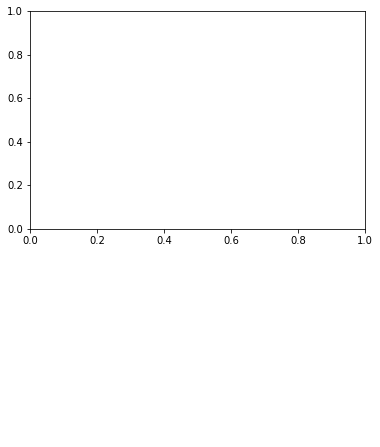

In [39]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
for word in words:
    print(word, vectors[word2int[word]][1])
    ax.annotate(word, (vectors[word2int[word]][0],vectors[word2int[word]][1] ))
plt.show()